<a href="https://colab.research.google.com/github/suzuken0/Laboratory_course/blob/master/%E3%80%90%E5%AE%8C%E6%88%90%E3%80%91%E8%BC%AA%E9%83%AD%E5%BA%A7%E6%A8%99%E6%8A%BD%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**YOLACT_Mobius_ocular_dataset**

Create YOLACT instance segentation model for periocular area, trained using Mobius ocular dataset

https://sclera.fri.uni-lj.si/datasets.html

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import collections as cl

import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import measure
from skimage.segmentation import clear_border
from skimage.filters import threshold_otsu

import glob
import sys
import os

In [3]:
mask_path = "/content/drive/MyDrive/AI_laboratory_course/SBVPI/SBVPI/1/1L_l_1_canthus.png"

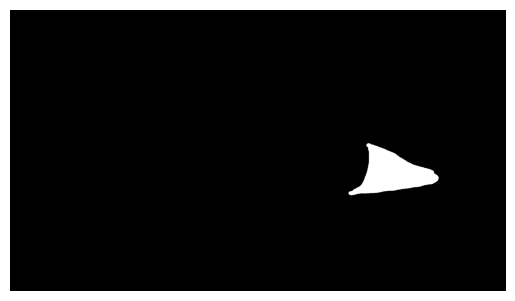

In [5]:
# 画像を読み込む
image = cv2.imread(mask_path)

# OpenCVでは画像はBGRフォーマットで読み込まれるので、RGBフォーマットに変換
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像を表示
plt.imshow(image)
plt.axis('off') # 軸を非表示に
plt.show()

In [11]:
def extract_contours(file_path):
    img = cv2.imread(file_path, 0)
    contours = measure.find_contours(img, 0.5)
    points_list = []

    for contour in contours:
        contour_length = len(contour)
        if contour_length > 24:
            step = contour_length // 24
            selected_points = [contour[i * step] for i in range(24)]
        else:
            selected_points = contour

        points = [[float(point[1]), float(point[0])] for point in selected_points]
        points_list.append(points)

    return points_list

def create_json_structure(points_list, json_name):
    data = {
        "version": "5.4.1",
        "flags": {},
        "shapes": []
    }

    for points in points_list:
        shape = {
            "label": "canthus",
            "points": points,
            "group_id": None,
            "description": "",
            "shape_type": "polygon",
            "flags": {},
            "mask": None
        }
        data["shapes"].append(shape)

    with open(json_name, 'w') as fw:
        json.dump(data, fw, indent=2)

def main(mask_file, json_name):
    points_list = extract_contours(mask_file)
    create_json_structure(points_list, json_name)

mask_file = "/content/drive/MyDrive/AI_laboratory_course/SBVPI/SBVPI/1/1L_l_1_canthus.png"
json_name = "output.json"

if __name__ == '__main__':
    main(mask_file, json_name)


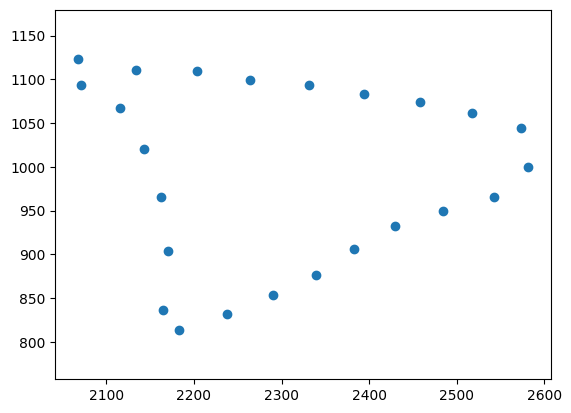

In [12]:
import json
import matplotlib.pyplot as plt

with open('/content/output.json') as f:
    data = json.load(f)

points = []
for shape in data['shapes']:
    points += shape['points']

x = [point[0] for point in points]
y = [point[1] for point in points]

plt.scatter(x, y)

# 縦横の縮尺を同じにする
plt.axis('equal')

plt.show()
